# **AIR QUALITY INDEX (AQI) PREDICTION AND FORECASTING USING MACHINE LEARNING AND TIME SERIES MODELS**
### **Minor Project**

---

### **Prepared By:**  
**Kumar Shreshth**  
Roll No: **BTECH/10670/22**

**Aditya Pandey**  
Roll No: **BTECH/10541/22**

---

### **Under the Guidance of:**  
**Prof. Dr. Tanushree Bhattacharya**  
Department of Civil Engineering  
Birla Institute of Technology, Mesra

---

### **Academic Year:** **2022–2026**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/Patna_AQIBulletins.csv')

In [ ]:
df.columns

Index(['date', 'City', 'No. Stations', 'Air Quality', 'Index Value',
       'Prominent Pollutant'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590 entries, 0 to 2589
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 2590 non-null   object 
 1   City                 2590 non-null   object 
 2   No. Stations         2590 non-null   float64
 3   Air Quality          2590 non-null   object 
 4   Index Value          2590 non-null   int64  
 5   Prominent Pollutant  2590 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 121.5+ KB


In [ ]:
df.describe()

,No. Stations,Index Value
count,2590.000000,2590.000000
mean,3.427413,190.402317
std,2.237696,108.367030
min,1.000000,30.000000
25%,1.000000,93.000000
50%,4.000000,172.000000
75%,6.000000,272.000000
max,6.000000,488.000000


In [ ]:
df.head()


,date,City,No. Stations,Air Quality,Index Value,Prominent Pollutant
0,2015-09-18,Patna,1.0,Moderate,107,PM10
1,2015-09-19,Patna,1.0,Moderate,136,PM10
2,2015-09-22,Patna,1.0,Satisfactory,93,PM10
3,2015-09-23,Patna,1.0,Moderate,102,PM10
4,2015-09-25,Patna,1.0,Moderate,136,PM10


In [ ]:
df.tail()

In [ ]:
df.shape


(2590, 6)

In [ ]:
df.isnull().sum()

,0
date,0
City,0
No. Stations,0
Air Quality,0
Index Value,0
Prominent Pollutant,0


In [ ]:
df.groupby('Prominent Pollutant')['Index Value'].mean().sort_values(ascending=False)


,Index Value
Prominent Pollutant,
PM2.5,238.596906
"PM10, PM2.5",217.102874
OZONE,164.383562
"CO, PM2.5",134.500000
"NO2, PM2.5",131.619048
"NO2, PM10, PM2.5",121.367347
"O3, PM2.5",120.307692
PM10,114.161290
"CO, PM10, PM2.5",112.040000


In [ ]:
pd.crosstab(df['Prominent Pollutant'], df['Air Quality'])

Air Quality,Good,Moderate,Poor,Satisfactory,Severe,Very Poor
Prominent Pollutant,,,,,,
CO,1,2,0,32,0,0
"CO, NO2, O3",1,0,0,2,0,0
"CO, NO2, PM10",0,6,0,6,0,0
"CO, NO2, PM2.5",2,5,0,1,0,0
"CO, O3",3,0,0,3,0,0
"CO, O3, PM10",11,3,0,39,0,0
"CO, O3, PM2.5",1,0,0,3,0,0
"CO, PM10",6,12,0,31,0,0
"CO, PM10, PM2.5",1,13,1,10,0,0


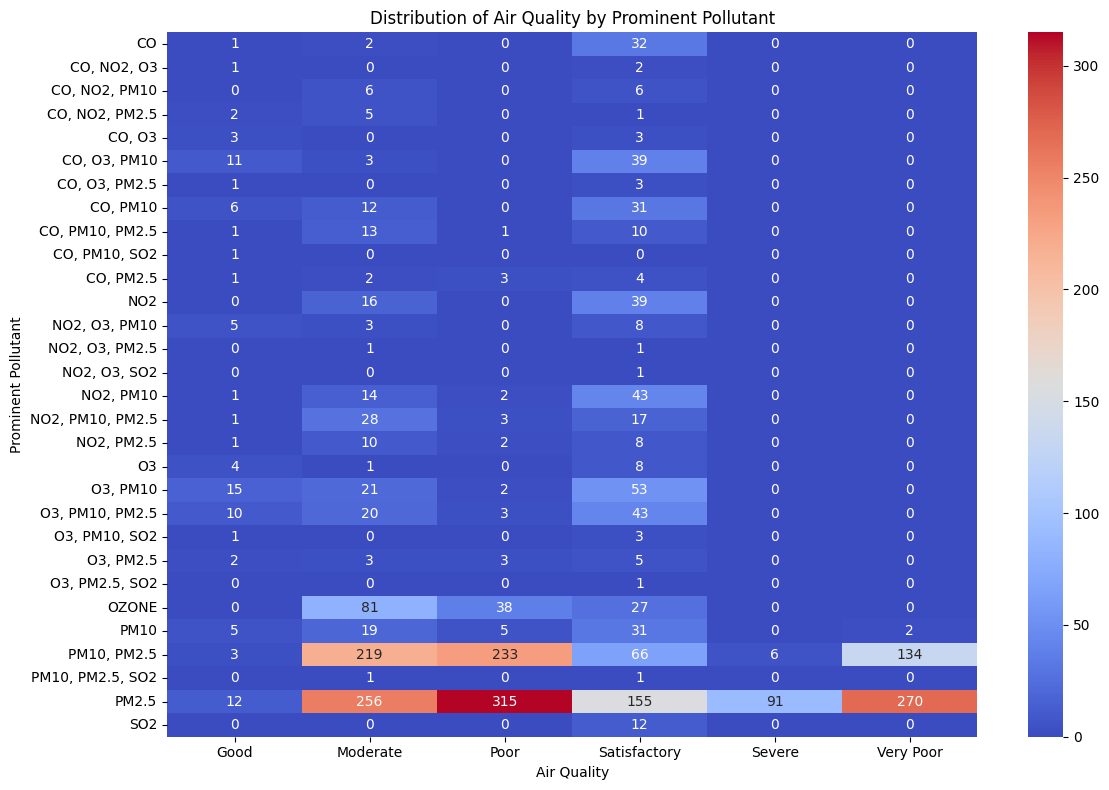

In [ ]:
plt.figure(figsize=(12, 8)) # Increase figure size
sns.heatmap(pd.crosstab(df['Prominent Pollutant'], df['Air Quality']), annot=True, cmap='coolwarm', fmt='d')
plt.title("Distribution of Air Quality by Prominent Pollutant") # Add a title for clarity
plt.xlabel("Air Quality")
plt.ylabel("Prominent Pollutant")
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

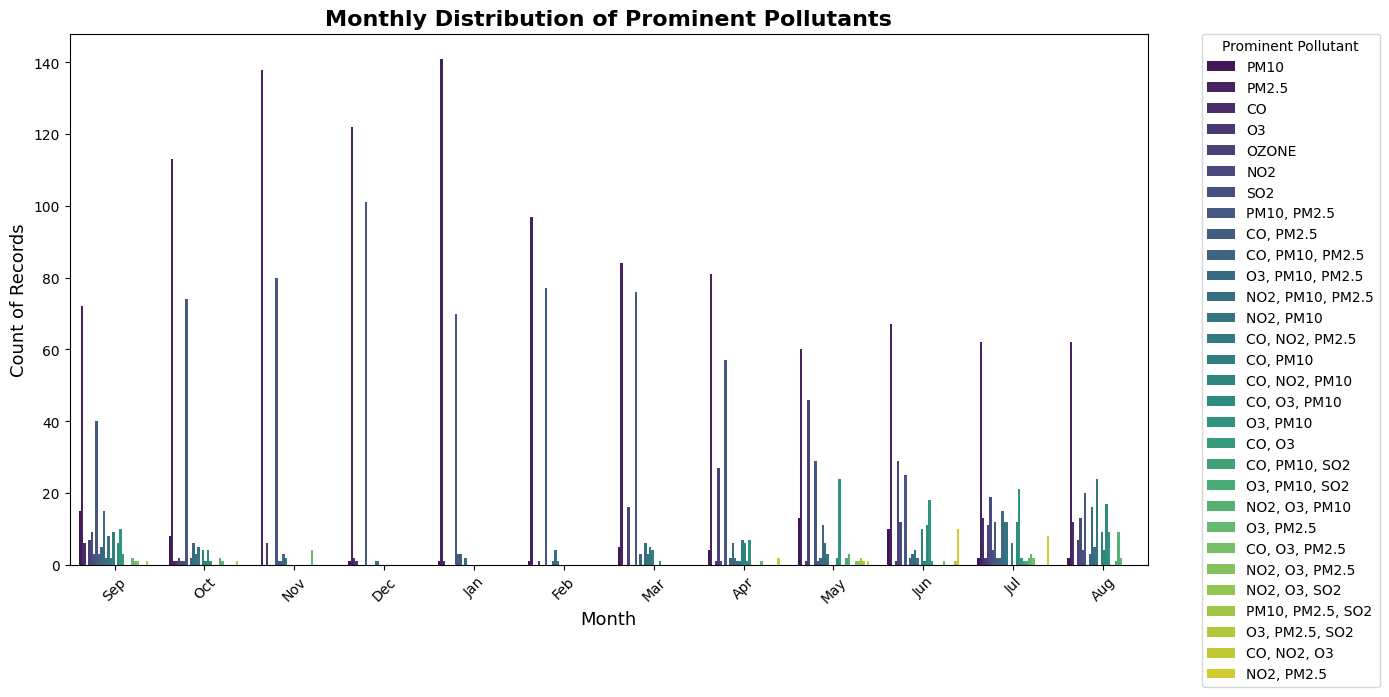

In [ ]:
df['Month'] = pd.to_datetime(df['date']).dt.month

df['Month_Name'] = df['Month'].apply(lambda x: pd.Timestamp(month=x, day=1, year=2025).strftime('%b'))

plt.figure(figsize=(14, 7))

sns.countplot(
    data=df,
    x='Month_Name',
    hue='Prominent Pollutant',
    palette='viridis'

)

plt.title("Monthly Distribution of Prominent Pollutants", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=13)
plt.ylabel("Count of Records", fontsize=13)


plt.xticks(rotation=45)

# Move legend outside the plot to avoid overlapping
plt.legend(
    title="Prominent Pollutant",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()  # ensures elements don’t overlap
plt.show()

In [ ]:
df_encoded = pd.get_dummies(df['Prominent Pollutant'], drop_first=True)
correlation = df_encoded.corrwith(df['Index Value'])
print(correlation.sort_values(ascending=False))

PM2.5               0.381896
PM10, PM2.5         0.144259
NO2, O3, SO2       -0.020389
NO2, O3, PM2.5     -0.021527
O3, PM2.5, SO2     -0.024561
CO, PM10, SO2      -0.026012
PM10, PM2.5, SO2   -0.026274
CO, PM2.5          -0.032122
CO, NO2, PM2.5     -0.042527
CO, NO2, O3        -0.043500
O3, PM10, SO2      -0.044704
O3, PM2.5          -0.045950
NO2, PM2.5         -0.049053
CO, O3, PM2.5      -0.049060
CO, NO2, PM10      -0.054723
OZONE              -0.058695
CO, O3             -0.060887
CO, PM10, PM2.5    -0.071404
SO2                -0.080540
O3                 -0.081097
NO2, O3, PM10      -0.084659
NO2, PM10, PM2.5   -0.088481
PM10               -0.110200
NO2                -0.130367
NO2, PM10          -0.132947
CO, PM10           -0.145948
O3, PM10, PM2.5    -0.153647
CO, O3, PM10       -0.169354
O3, PM10           -0.190054
dtype: float64


/tmp/ipython-input-760210328.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Prominent Pollutant', y='Index Value', estimator='mean', ci=None)


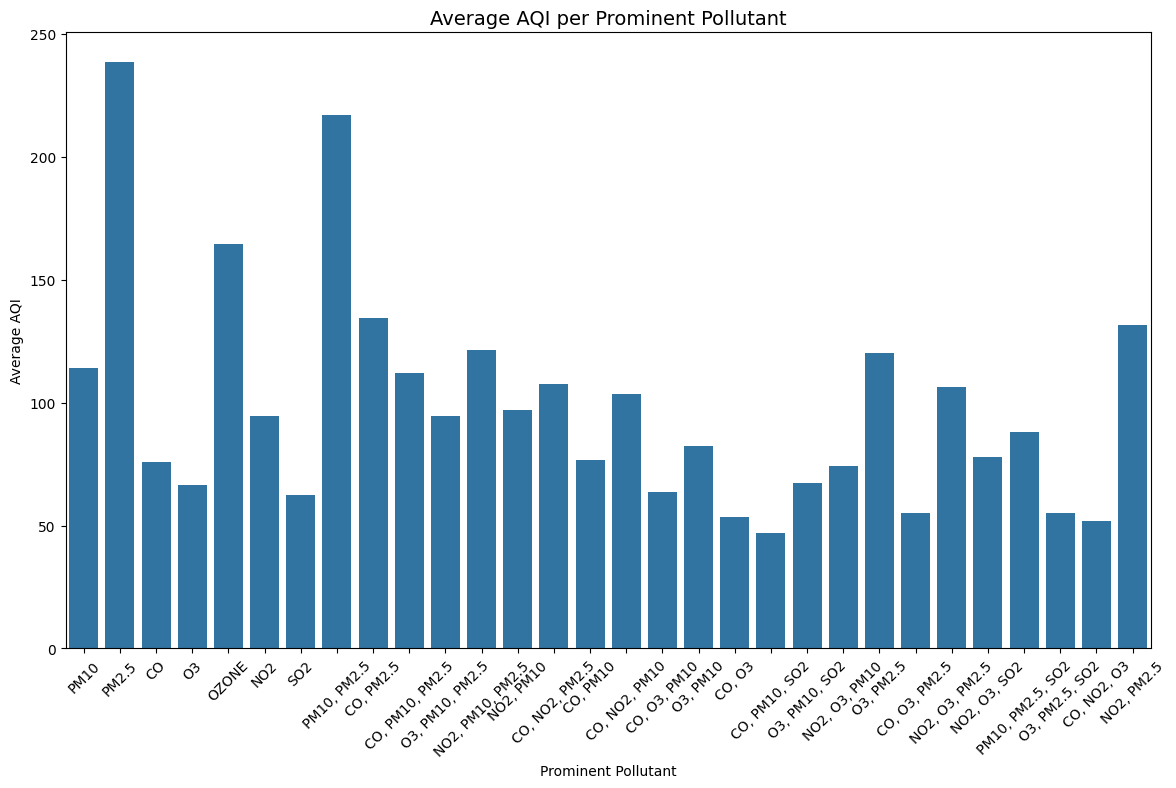

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(data=df, x='Prominent Pollutant', y='Index Value', estimator='mean', ci=None)
plt.title("Average AQI per Prominent Pollutant", fontsize=14)
plt.xlabel("Prominent Pollutant")
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day


<Axes: xlabel='Month', ylabel='Index Value'>

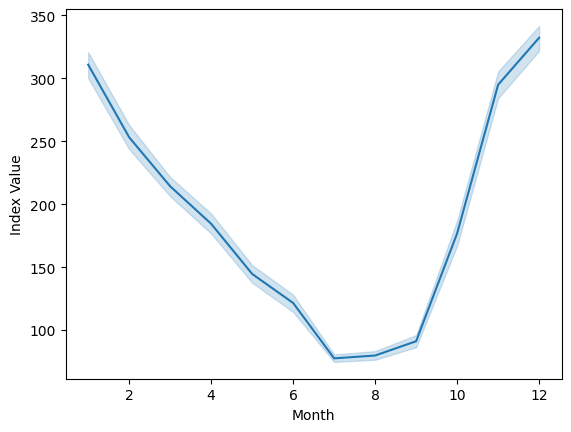

In [ ]:
df.groupby('Month')['Index Value'].mean()
sns.lineplot(data=df, x='Month', y='Index Value')

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Air_Quality_Label'] = encoder.fit_transform(df['Air Quality'])
print(encoder.classes_)

['Good' 'Moderate' 'Poor' 'Satisfactory' 'Severe' 'Very Poor']


**Applying classification to predict category**

In [ ]:
df = df[['Index Value', 'Prominent Pollutant', 'Month', 'Air Quality']]
df = df.dropna()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Air Quality' - 'Prominent Pollutant' is encoded in the next cell
encoder_quality = LabelEncoder()
df['Air Quality'] = encoder_quality.fit_transform(df['Air Quality'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd


encoder_pollutant = LabelEncoder()
df['Prominent Pollutant Enc'] = encoder_pollutant.fit_transform(df['Prominent Pollutant'])


df['Month'] = pd.to_numeric(df['Month'], errors='coerce')


X = df[['Index Value', 'Prominent Pollutant Enc', 'Month']].dropna()
y = df.loc[X.index, 'Air Quality']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Model Accuracy: 99.81 %

Classification Report:
               precision    recall  f1-score   support

        Good       1.00      0.94      0.97        17
    Moderate       1.00      1.00      1.00       134
        Poor       1.00      1.00      1.00       112
Satisfactory       0.99      1.00      1.00       139
      Severe       1.00      1.00      1.00        21
   Very Poor       1.00      1.00      1.00        95

    accuracy                           1.00       518
   macro avg       1.00      0.99      0.99       518
weighted avg       1.00      1.00      1.00       518



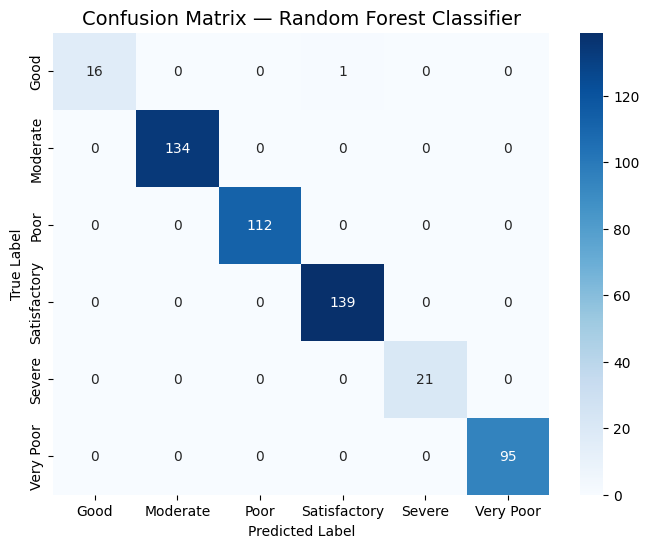

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
# Ensure X_test has the same columns as X_train used during fitting
y_pred = model.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")

# Detailed report (Precision, Recall, F1-score)
# Assuming encoder_quality is available from a previous cell
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder_quality.classes_))

# Confusion Matrix
# Assuming encoder_quality is available from a previous cell
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder_quality.classes_,
            yticklabels=encoder_quality.classes_)
plt.title("Confusion Matrix — Random Forest Classifier", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score



df['Air Quality Enc'] = encoder_quality.fit_transform(df['Air Quality'])
df['Prominent Pollutant Enc'] = encoder_pollutant.fit_transform(df['Prominent Pollutant'])


X = df[['Index Value']]
y_quality = df['Air Quality Enc']
y_pollutant = df['Prominent Pollutant Enc']

X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(X, y_quality, test_size=0.2, random_state=42)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y_pollutant, test_size=0.2, random_state=42)


model_quality = RandomForestClassifier(random_state=42)
model_quality.fit(X_train_q, y_train_q)

model_pollutant = RandomForestClassifier(random_state=42)
model_pollutant.fit(X_train_p, y_train_p)


pred_q = model_quality.predict(X_test_q)
pred_p = model_pollutant.predict(X_test_p)

acc_quality = accuracy_score(y_test_q, pred_q)
acc_pollutant = accuracy_score(y_test_p, pred_p)

print(f"Air Quality Model Accuracy: {acc_quality*100:.2f}%")
print(f"Pollutant Model Accuracy: {acc_pollutant*100:.2f}%")


user_aqi = float(input("Enter AQI value: "))

# Predict Air Quality
predicted_quality_enc = model_quality.predict([[user_aqi]])[0]
predicted_quality = encoder_quality.inverse_transform([predicted_quality_enc])[0]

# Predict Pollutant
predicted_pollutant_enc = model_pollutant.predict([[user_aqi]])[0]
predicted_pollutant = encoder_pollutant.inverse_transform([predicted_pollutant_enc])[0]

print("\n=== Prediction Results ===")
print(f"AQI Value: {user_aqi}")
print(f"Predicted Air Quality: {predicted_quality}")
print(f"Predicted Prominent Pollutant: {predicted_pollutant}")

Air Quality Model Accuracy: 100.00%
Pollutant Model Accuracy: 35.14%
Enter AQI value: 150

=== Prediction Results ===
AQI Value: 150.0
Predicted Air Quality: 1
Predicted Prominent Pollutant: PM10, PM2.5


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Using XGB Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.multiclass import unique_labels


df["date"] = pd.to_datetime(df["date"])

# Extract useful date-based features
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["dayofweek"] = df["date"].dt.dayofweek

# Select features and target
X = df[["Index Value", "year", "month", "day", "dayofweek"]]
y = df["Prominent Pollutant"]

# Encode target labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

dt_model = DecisionTreeClassifier(
    max_depth=8,
    random_state=42
)
dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)


# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Classification report (handle labels correctly)
labels_present = unique_labels(y_test, y_pred)
target_names = le.inverse_transform(labels_present)
report = classification_report(
    y_test, y_pred,
    labels=labels_present,
    target_names=target_names,
    zero_division=0
)

# Feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False)


print("\n✅ Model Evaluation")
print(f"Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:\n", report)

print("\n📊 Feature Importance:")
print(feature_importance)


# Example: Predict pollutant for AQI=120, Date=2025-01-15
sample_date = pd.to_datetime("2025-01-15")
sample_input = pd.DataFrame({
    "Index Value": [120],
    "year": [sample_date.year],
    "month": [sample_date.month],
    "day": [sample_date.day],
    "dayofweek": [sample_date.dayofweek]
})

predicted_class = dt_model.predict(sample_input)
predicted_pollutant = le.inverse_transform(predicted_class)[0]

print(f"\n🔮 Predicted Prominent Pollutant for AQI=120 on 2025-01-15: {predicted_pollutant}")


✅ Model Evaluation
Accuracy: 63.71%

Classification Report:
                   precision    recall  f1-score   support

              CO       0.20      0.33      0.25         3
   CO, NO2, PM10       0.43      0.60      0.50         5
  CO, NO2, PM2.5       0.00      0.00      0.00         3
          CO, O3       0.00      0.00      0.00         1
    CO, O3, PM10       0.19      0.50      0.28         8
   CO, O3, PM2.5       0.00      0.00      0.00         1
        CO, PM10       0.22      0.18      0.20        11
 CO, PM10, PM2.5       0.00      0.00      0.00         3
             NO2       0.43      0.21      0.29        14
   NO2, O3, PM10       0.18      0.50      0.27         4
    NO2, O3, SO2       0.00      0.00      0.00         1
       NO2, PM10       0.58      0.41      0.48        17
NO2, PM10, PM2.5       0.25      0.12      0.16        17
      NO2, PM2.5       0.00      0.00      0.00         4
              O3       0.00      0.00      0.00         2
        O

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Re-encode 'Prominent Pollutant' as the dataframe was reloaded
encoder_pollutant = LabelEncoder()
df['Prominent Pollutant Enc'] = encoder_pollutant.fit_transform(df['Prominent Pollutant'])

print(df['Prominent Pollutant Enc'].value_counts())

Prominent Pollutant Enc
28    1099
26     661
24     146
19      91
20      76
25      62
15      60
11      55
5       53
16      49
7       49
0       35
8       25
17      21
12      16
22      13
18      13
29      12
2       12
10      10
3        8
4        6
6        4
21       4
1        3
27       2
13       2
9        1
14       1
23       1
Name: count, dtype: int64


In [ ]:
encoder_quality.inverse_transform([predicted_quality_enc])

array([1])

In [ ]:
# Reload the original dataset to ensure 'date' and 'Index Value' columns are available
df = pd.read_csv('/content/Patna_AQIBulletins.csv')

# Create new_df with the necessary columns
new_df = df[['date','Index Value']].copy()

# **`Applying FB Prophet model for Forecasting`**

---



In [ ]:
new_df = df[['date','Index Value']].copy()

In [ ]:
from prophet import Prophet

In [ ]:
new_df.head()

,date,Index Value
0,2015-09-18,107
1,2015-09-19,136
2,2015-09-22,93
3,2015-09-23,102
4,2015-09-25,136


In [ ]:
new_df.shape

(2590, 2)

In [ ]:
new_df.columns = ['ds','y']

In [ ]:
try:
    import prophet
    import cmdstanpy
    print("Prophet and cmdstanpy imported successfully.")

    from cmdstanpy import CmdStanPath
    cmdstan_path = CmdStanPath().cmdstan_path()
    print(f"CmdStan installed at: {cmdstan_path}")

except ImportError as e:
    print(f"Error importing library: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Prophet and cmdstanpy imported successfully.
Error importing library: cannot import name 'CmdStanPath' from 'cmdstanpy' (/usr/local/lib/python3.12/dist-packages/cmdstanpy/__init__.py)


In [ ]:
new_df = df[['date','Index Value']].copy()
new_df.columns = ['ds', 'y']

In [ ]:
!pip install prophet

In [ ]:
import cmdstanpy
cmdstanpy.install_cmdstan(overwrite=True)


CmdStan install directory: /root/.cmdstan
Installing CmdStan version: 2.37.0
Download successful, file: /tmp/tmphwj3yo6r
Extracting distribution
Unpacked download as cmdstan-2.37.0
Building version cmdstan-2.37.0, may take several minutes, depending on your system.
Installed cmdstan-2.37.0
Test model compilation


True

In [ ]:
from cmdstanpy import cmdstan_path
print(cmdstan_path())


/root/.cmdstan/cmdstan-2.37.0


In [ ]:
from prophet import Prophet


In [ ]:
!pip install --upgrade prophet cmdstanpy --quiet
import cmdstanpy
cmdstanpy.install_cmdstan(overwrite=True)

from prophet import Prophet
print("✅ Prophet and CmdStan are ready to use!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 47.4 MB/s eta 0:00:00
CmdStan install directory: /root/.cmdstan
Installing CmdStan version: 2.37.0
Download successful, file: /tmp/tmpsmjr3ni5
Extracting distribution
Unpacked download as cmdstan-2.37.0
Building version cmdstan-2.37.0, may take several minutes, depending on your system.
Overwrite requested, remove existing build of version cmdstan-2.37.0
Rebuilding version cmdstan-2.37.0


In [ ]:
future = m.make_future_dataframe(periods=1000,freq='D')
future.tail()

,ds
3585,2026-09-22
3586,2026-09-23
3587,2026-09-24
3588,2026-09-25
3589,2026-09-26


In [ ]:
m = Prophet(stan_backend='CMDSTANPY')
m.fit(new_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=665,freq='D')
forecast = m.predict(future)
display(forecast.tail(10))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3245,2025-10-17,185.431453,101.012163,247.078616,164.077402,207.965393,-12.608910,-12.608910,-12.608910,0.198698,0.198698,0.198698,-12.807608,-12.807608,-12.807608,0.0,0.0,0.0,172.822543
3246,2025-10-18,185.428882,105.725939,248.769486,163.987591,207.983469,-8.546147,-8.546147,-8.546147,-1.139258,-1.139258,-1.139258,-7.406890,-7.406890,-7.406890,0.0,0.0,0.0,176.882735
3247,2025-10-19,185.426311,110.389833,258.116398,163.897780,208.001544,-4.876440,-4.876440,-4.876440,-2.897865,-2.897865,-2.897865,-1.978575,-1.978575,-1.978575,0.0,0.0,0.0,180.549871
3248,2025-10-20,185.423740,115.288634,266.632078,163.807968,208.018858,2.963870,2.963870,2.963870,-0.498677,-0.498677,-0.498677,3.462547,3.462547,3.462547,0.0,0.0,0.0,188.387610
3249,2025-10-21,185.421169,126.109951,272.496667,163.718157,208.031754,10.736316,10.736316,10.736316,1.834452,1.834452,1.834452,8.901864,8.901864,8.901864,0.0,0.0,0.0,196.157485
3250,2025-10-22,185.418598,122.102878,274.621040,163.628346,208.044651,13.693935,13.693935,13.693935,-0.631040,-0.631040,-0.631040,14.324975,14.324975,14.324975,0.0,0.0,0.0,199.112533
3251,2025-10-23,185.416027,136.126598,287.316176,163.564056,208.057548,22.851399,22.851399,22.851399,3.133689,3.133689,3.133689,19.717710,19.717710,19.717710,0.0,0.0,0.0,208.267426
3252,2025-10-24,185.413456,133.716143,285.644588,163.511912,208.070444,25.264853,25.264853,25.264853,0.198698,0.198698,0.198698,25.066155,25.066155,25.066155,0.0,0.0,0.0,210.678309
3253,2025-10-25,185.410885,143.650870,284.941847,163.459768,208.083341,29.217418,29.217418,29.217418,-1.139258,-1.139258,-1.139258,30.356675,30.356675,30.356675,0.0,0.0,0.0,214.628303
3254,2025-10-26,185.408314,139.194283,288.491130,163.407624,208.096238,32.678073,32.678073,32.678073,-2.897865,-2.897865,-2.897865,35.575939,35.575939,35.575939,0.0,0.0,0.0,218.086387


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_upper', 'yhat_lower']].tail(10)

,ds,yhat,yhat_upper,yhat_lower
3245,2025-10-17,172.822543,247.405547,99.245686
3246,2025-10-18,176.882735,252.834416,104.285606
3247,2025-10-19,180.549871,251.781720,106.441400
3248,2025-10-20,188.387610,261.790129,114.530234
3249,2025-10-21,196.157485,270.271941,123.264040
3250,2025-10-22,199.112533,278.032360,129.358597
3251,2025-10-23,208.267426,280.094888,136.329835
3252,2025-10-24,210.678309,283.601571,137.563074
3253,2025-10-25,214.628303,292.615813,140.940029
3254,2025-10-26,218.086387,289.659077,147.830397


**on 22-10-25 **
Actual AQI = 203
Preducted = 199.11
# Error = ((|Actual - Predicted|)/Actual)*100
  Error = ((203-199.11)/203)*100
        = 1.9%




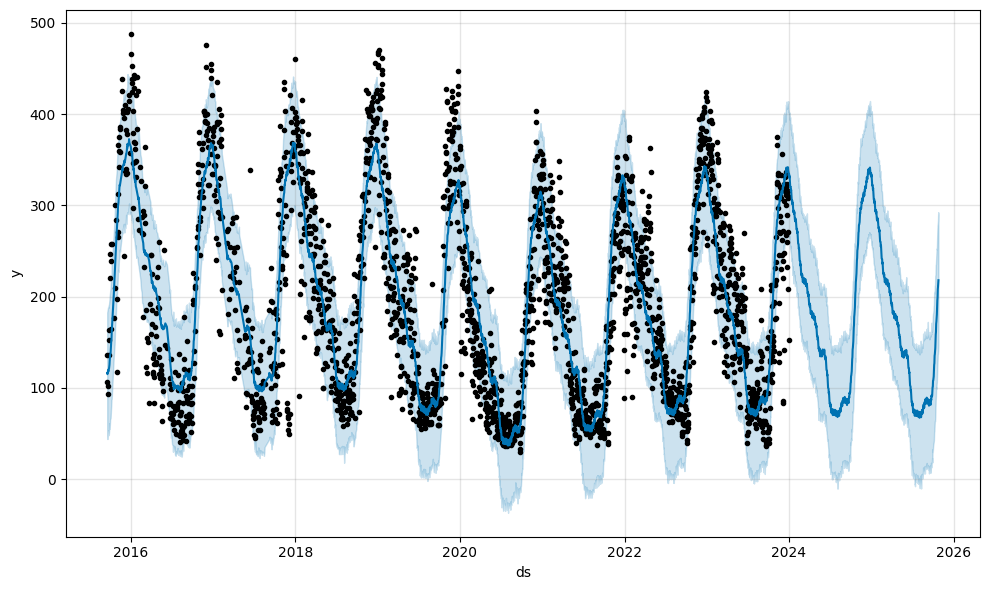

In [ ]:
fig1 = m.plot(forecast)

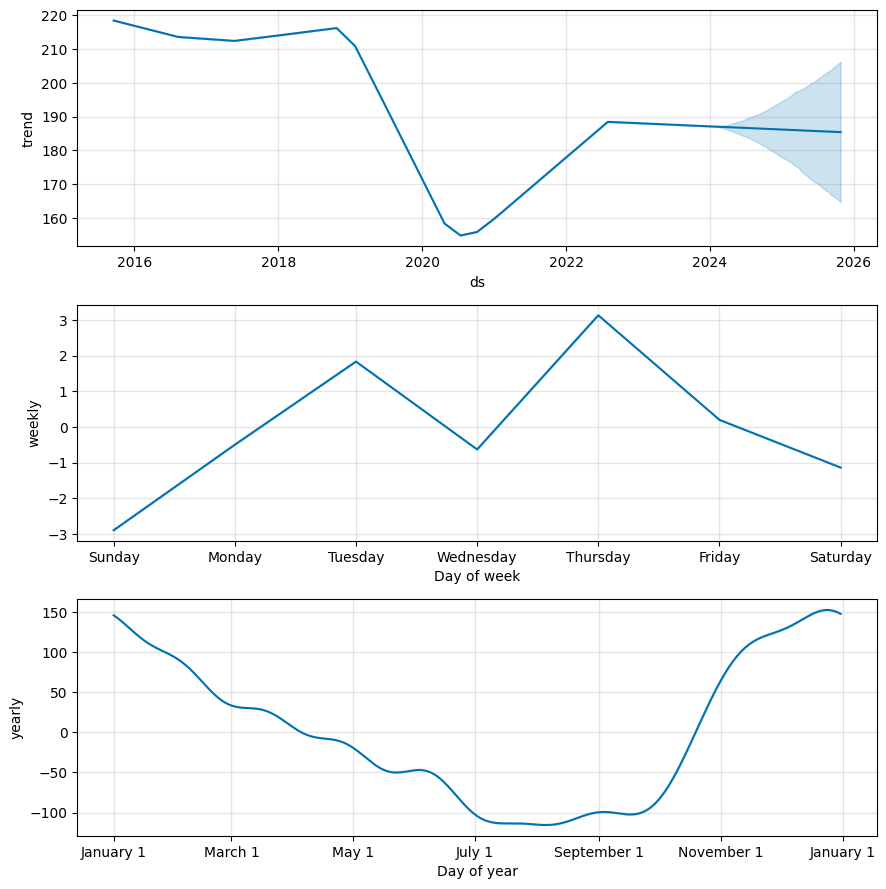

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
# Split data
train = df[df['ds'] < '2022-05-01']
test = df[df['ds'] >= '2022-05-01'].copy() # Use .copy() to avoid SettingWithCopyWarning

# Train Prophet
model = Prophet()
model.fit(train[['ds', 'y']])

# Forecast for test period
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

# Evaluate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(eval_df['y'], eval_df['yhat'])
mae = mean_absolute_error(eval_df['y'], eval_df['yhat'])
rmse = np.sqrt(mean_squared_error(eval_df['y'], eval_df['yhat']))

print(f"R² Score : {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


R² Score : 0.730
MAE: 39.90
RMSE: 52.03
MAPE: 28.10%


In [ ]:
future = m.make_future_dataframe(periods=665,freq='D')
forecast = m.predict(future)
display(forecast.tail(10))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3245,2025-10-17,185.431453,102.014265,248.135765,164.768412,207.386308,-12.608910,-12.608910,-12.608910,0.198698,0.198698,0.198698,-12.807608,-12.807608,-12.807608,0.0,0.0,0.0,172.822543
3246,2025-10-18,185.428882,104.459070,251.760316,164.679713,207.426234,-8.546147,-8.546147,-8.546147,-1.139258,-1.139258,-1.139258,-7.406890,-7.406890,-7.406890,0.0,0.0,0.0,176.882735
3247,2025-10-19,185.426311,108.341902,256.570804,164.628877,207.490356,-4.876440,-4.876440,-4.876440,-2.897865,-2.897865,-2.897865,-1.978575,-1.978575,-1.978575,0.0,0.0,0.0,180.549871
3248,2025-10-20,185.423740,114.950292,261.700486,164.592352,207.554477,2.963870,2.963870,2.963870,-0.498677,-0.498677,-0.498677,3.462547,3.462547,3.462547,0.0,0.0,0.0,188.387610
3249,2025-10-21,185.421169,122.646747,270.511563,164.555827,207.617215,10.736316,10.736316,10.736316,1.834452,1.834452,1.834452,8.901864,8.901864,8.901864,0.0,0.0,0.0,196.157485
3250,2025-10-22,185.418598,127.295103,277.729646,164.462921,207.677660,13.693935,13.693935,13.693935,-0.631040,-0.631040,-0.631040,14.324975,14.324975,14.324975,0.0,0.0,0.0,199.112533
3251,2025-10-23,185.416027,132.370271,279.640863,164.340601,207.738104,22.851399,22.851399,22.851399,3.133689,3.133689,3.133689,19.717710,19.717710,19.717710,0.0,0.0,0.0,208.267426
3252,2025-10-24,185.413456,134.588883,287.409207,164.302707,207.798549,25.264853,25.264853,25.264853,0.198698,0.198698,0.198698,25.066155,25.066155,25.066155,0.0,0.0,0.0,210.678309
3253,2025-10-25,185.410885,139.420298,291.073720,164.274500,207.858993,29.217418,29.217418,29.217418,-1.139258,-1.139258,-1.139258,30.356675,30.356675,30.356675,0.0,0.0,0.0,214.628303
3254,2025-10-26,185.408314,145.084249,296.455609,164.250198,207.919438,32.678073,32.678073,32.678073,-2.897865,-2.897865,-2.897865,35.575939,35.575939,35.575939,0.0,0.0,0.0,218.086387


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat']].tail(10)

,ds,yhat
3245,2025-10-17,172.822543
3246,2025-10-18,176.882735
3247,2025-10-19,180.549871
3248,2025-10-20,188.387610
3249,2025-10-21,196.157485
3250,2025-10-22,199.112533
3251,2025-10-23,208.267426
3252,2025-10-24,210.678309
3253,2025-10-25,214.628303
3254,2025-10-26,218.086387


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper','trend']].tail(10)

,ds,yhat,yhat_lower,yhat_upper,trend
3245,2025-10-17,172.822543,98.806798,244.342759,185.431453
3246,2025-10-18,176.882735,107.058985,249.301697,185.428882
3247,2025-10-19,180.549871,114.770466,251.226850,185.426311
3248,2025-10-20,188.387610,115.607322,262.123791,185.423740
3249,2025-10-21,196.157485,122.757953,273.802607,185.421169
3250,2025-10-22,199.112533,123.315013,279.873703,185.418598
3251,2025-10-23,208.267426,132.402027,282.741430,185.416027
3252,2025-10-24,210.678309,133.706128,279.704090,185.413456
3253,2025-10-25,214.628303,140.276221,287.606930,185.410885
3254,2025-10-26,218.086387,142.793687,291.858071,185.408314


In [ ]:
# Actual data Source = https://airquality.cpcb.gov.in/AQI_India/   Time (1:00 AM)

#  date            Actual-AQI       predicted-AQI
#  21-10-25         177              196.15
#  22-10-25         199              199.11
#  23-10-25         146              208.26
#  24-10-25         183              210.67
#  25-10-25         159              214.42
#  26-10-25         150              218.08
#  27-10-25         175